Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_train

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [3]:
df_train.shape

(31647, 18)

In [4]:
print("No.of rows in the dataset",df_train.shape[0])
print("No.of columns in the dataset",df_train.shape[1])

No.of rows in the dataset 31647
No.of columns in the dataset 18


The Dataset Contains 31647 rows and 18 columns where 17 are independent variables and 1 is target variable

In [5]:
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

This dataset contains two types of data:int64 and object

In [6]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

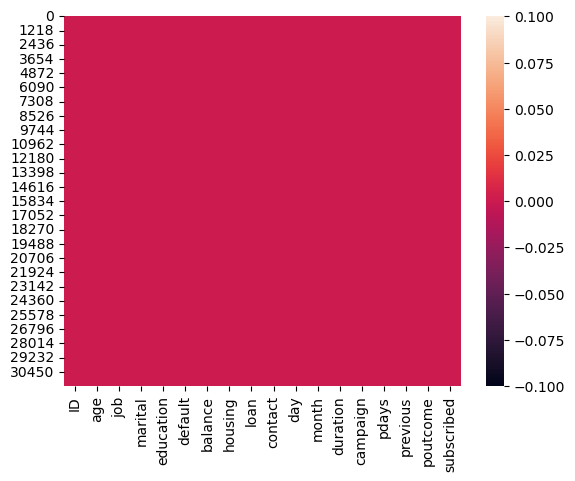

In [7]:
sns.heatmap(df_train.isnull())

From the above heatmap it is clear that there is no missing data present in our Dataset

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
df_train.duplicated().sum()

0

For me there are no requirement of ID column so we should remove it

In [10]:
df_train.drop(['ID'],axis=1,inplace=True)
df_train.head()

age         job   marital  education default  balance housing loan  \
0   56      admin.   married    unknown      no     1933      no   no   
1   31     unknown   married  secondary      no        3      no   no   
2   27    services   married  secondary      no      891     yes   no   
3   57  management  divorced   tertiary      no     3287      no   no   
4   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [11]:
df_train.nunique().to_frame("No of Unique Values")

No of Unique Values
age                          76
job                          12
marital                       3
education                     4
default                       2
balance                    6326
housing                       2
loan                          2
contact                       3
day                          31
month                        12
duration                   1454
campaign                     45
pdays                       509
previous                     38
poutcome                      4
subscribed                    2

Since the No.of Unique Values for target variable are 2 and the no of rows in the dataset are 31647 which is huge gap so this problem can be considered as Classification problem

Univariate Analysis

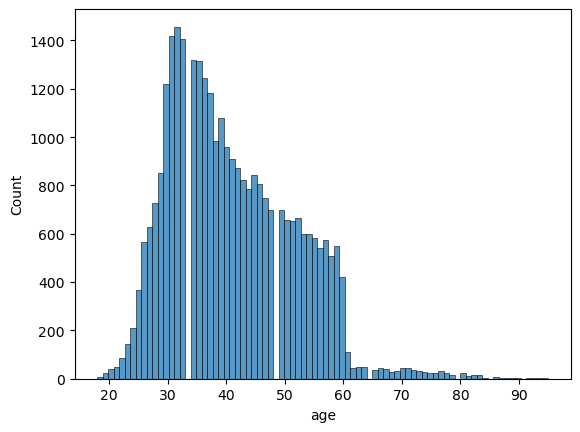

In [12]:
sns.histplot(df_train['age'])
plt.show()

We observe from the graph there are majority of persons in the age of 32 to 37.

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

blue-collar      21.619743
management       20.978292
technician       16.769362
admin.           11.473441
services          9.173065
retired           4.973615
self-employed     3.548520
entrepreneur      3.185136
unemployed        2.859671
housemaid         2.761715
student           2.006509
unknown           0.650931
Name: job, dtype: float64


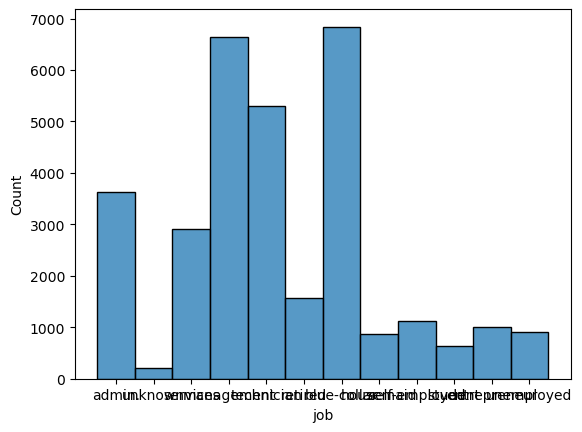

In [13]:
sns.histplot(df_train['job'])
print(df_train['job'].value_counts(),'\n')
print(df_train['job'].value_counts(normalize=True)*100)

As we observe from above data we observe that 40-45% persons are from management and blue-collar

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
married     60.337473
single      28.192246
divorced    11.470282
Name: marital, dtype: float64


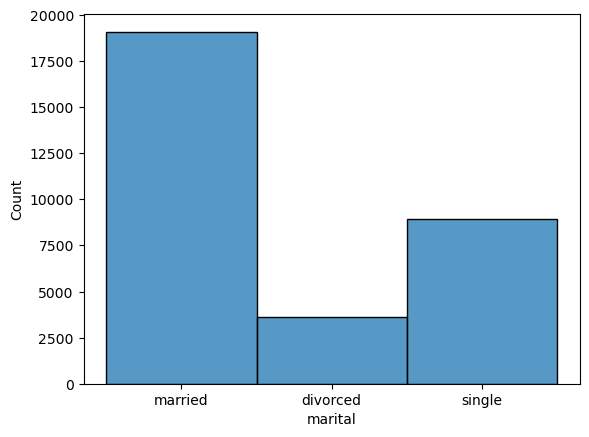

In [14]:
sns.histplot(df_train['marital'])
print(df_train['marital'].value_counts())
print(df_train['marital'].value_counts(normalize=True)*100)

From the above plot we can see that 60% persons are married.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
secondary    51.265523
tertiary     29.389832
primary      15.192593
unknown       4.152052
Name: education, dtype: float64


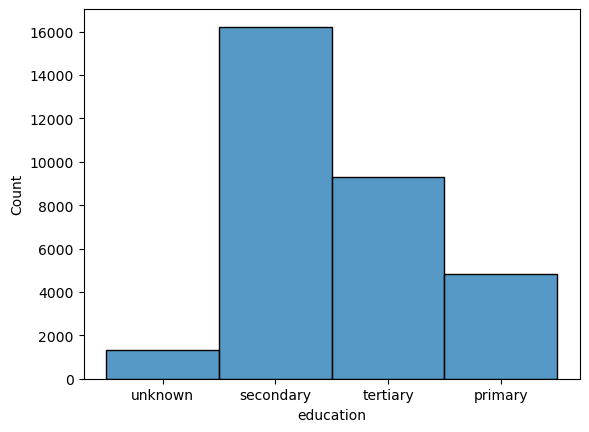

In [15]:
sns.histplot(df_train['education'])
print(df_train['education'].value_counts())
print(df_train['education'].value_counts(normalize=True)*100)

From the above plot we can see that majority around 50-55% are from secondary education.

no     31062
yes      585
Name: default, dtype: int64
no     98.151484
yes     1.848516
Name: default, dtype: float64


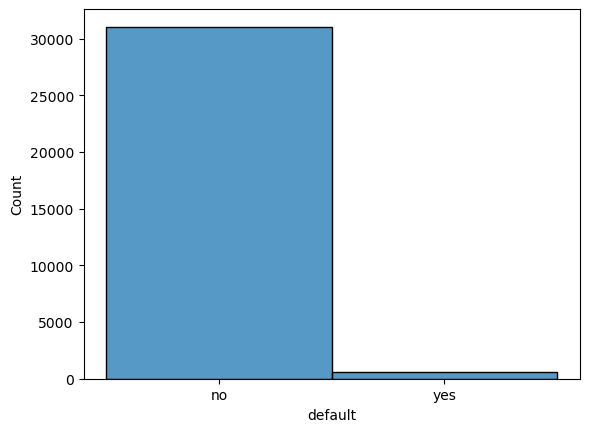

In [16]:
sns.histplot(df_train['default'])
print(df_train['default'].value_counts())
print(df_train['default'].value_counts(normalize=True)*100)

From the above plot we observe that around 90-98% said that they are non defaulter

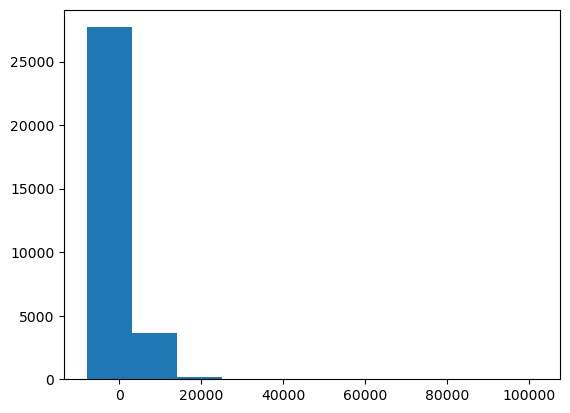

In [17]:
plt.plot(figsize=(7,9))
plt.hist(df_train['balance'])
plt.show()

From the above plot we observe majority persons have less than 10000 balance.

yes    17584
no     14063
Name: housing, dtype: int64
yes    55.562929
no     44.437071
Name: housing, dtype: float64


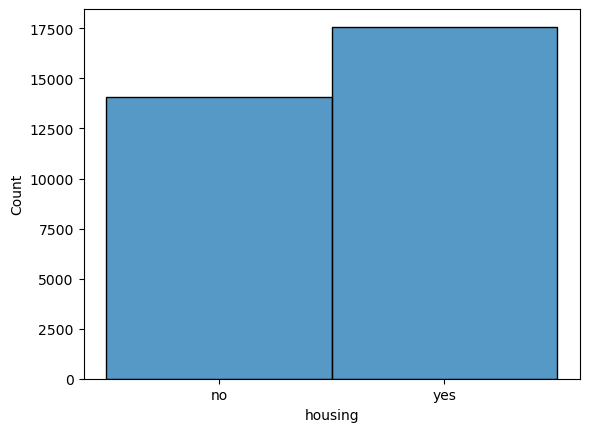

In [18]:
sns.histplot(df_train['housing'])
print(df_train['housing'].value_counts())
print(df_train['housing'].value_counts(normalize=True)*100)

From the above plot we observe that 50-60% people have taken housing loan

no     26516
yes     5131
Name: loan, dtype: int64
no     83.786773
yes    16.213227
Name: loan, dtype: float64


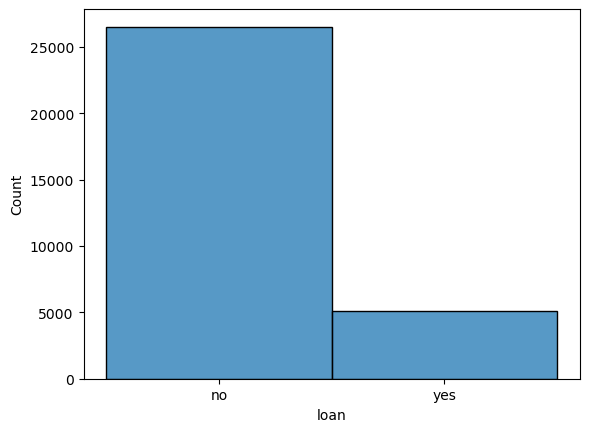

In [19]:
sns.histplot(df_train['loan'])
print(df_train['loan'].value_counts())
print(df_train['loan'].value_counts(normalize=True)*100)

From the above plot we observe that 80-85% people have taken personal loan

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
cellular     64.533763
unknown      28.998009
telephone     6.468228
Name: contact, dtype: float64


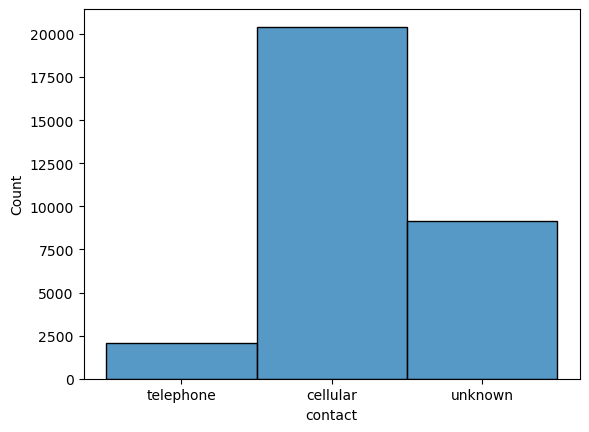

In [20]:
sns.histplot(df_train['contact'])
print(df_train['contact'].value_counts())
print(df_train['contact'].value_counts(normalize=True)*100)

From the above plot we observe that 60-70% people have contact is by cellular

<Axes: xlabel='day', ylabel='Count'>

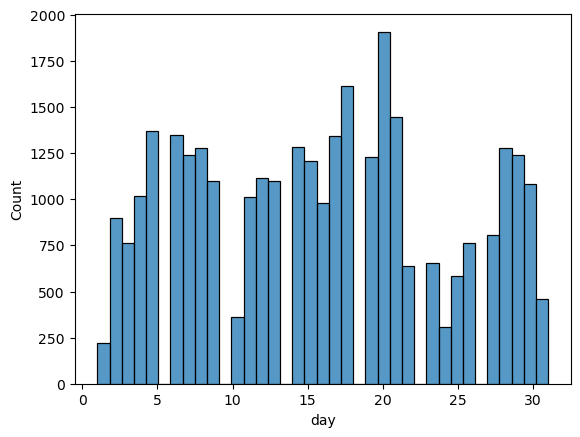

In [21]:
sns.histplot(df_train['day'])

From the above plot we oberve that majority of day is around 20

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64
may    30.552659
jul    15.306348
aug    13.691661
jun    11.811546
nov     8.793883
apr     6.493506
feb     5.773059
jan     3.087180
oct     1.617847
sep     1.295541
mar     1.080671
dec     0.496098
Name: month, dtype: float64


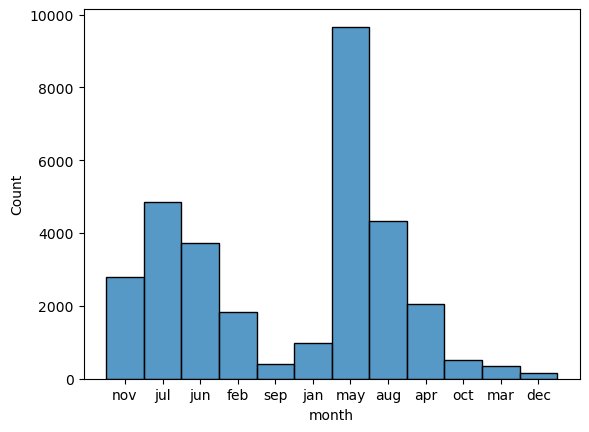

In [22]:
sns.histplot(df_train['month'])
print(df_train['month'].value_counts())
print(df_train['month'].value_counts(normalize=True)*100)

From the above plot we observe majority of contact month is May  

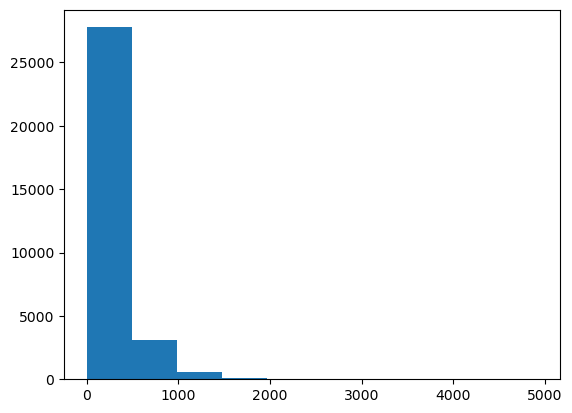

In [23]:
plt.hist(df_train['duration'])
plt.show()

From the above plot we observe mostly duration is between 0 to 500.

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64
1     38.746169
2     27.800423
3     12.190729
4      7.716371
5      3.934022
6      2.894429
7      1.636806
8      1.124909
9      0.745726
10     0.581414
11     0.398142
12     0.322305
13     0.293867
14     0.214870
15     0.192751
16     0.170632
17     0.164313
20     0.116915
18     0.116915
19     0.094796
21     0.060037
22     0.056877
25     0.053718
28     0.044238
23     0.041078
24     0.041078
29     0.037918

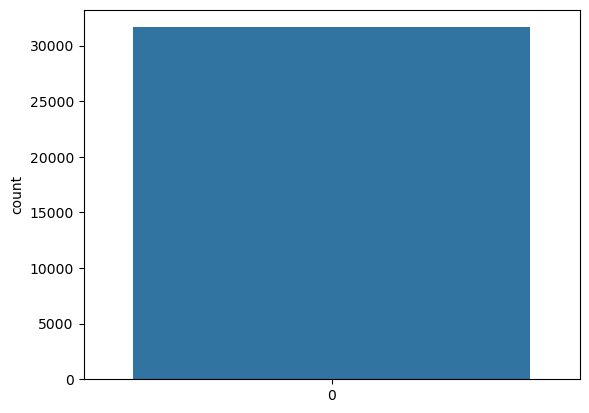

In [24]:
sns.countplot(df_train['campaign'])
print(df_train['campaign'].value_counts())
print(df_train['campaign'].value_counts(normalize=True)*100)

From the above plot we observe most people are connected in the campain of 1 and 2 around 65-70%

<Axes: xlabel='pdays', ylabel='Count'>

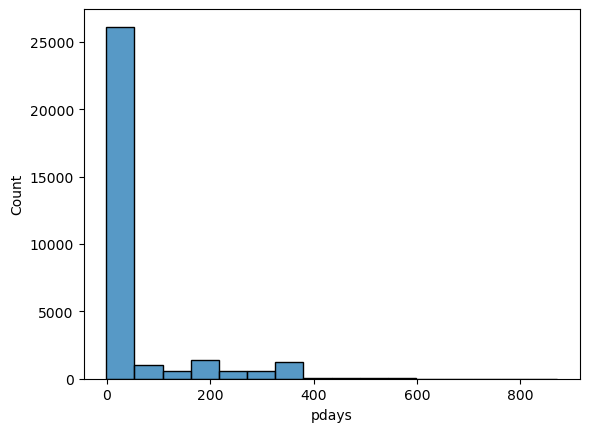

In [25]:
sns.histplot(df_train['pdays'])

We observe from graph that majority are from 0 to 50

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64
unknown    81.931937
failure    10.623440
other       4.069896
success     3.374727
Name: poutcome, dtype: float64


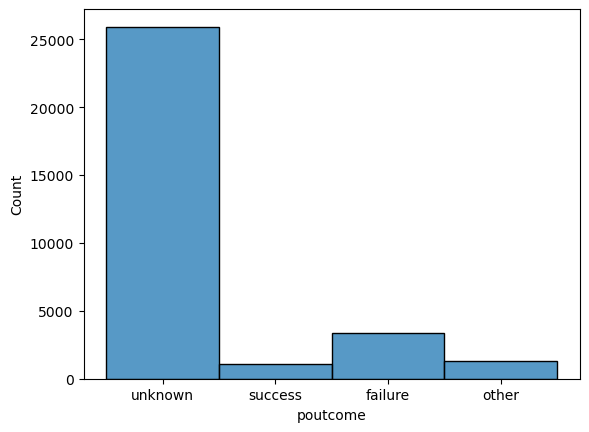

In [26]:
sns.histplot(df_train['poutcome'])
print(df_train['poutcome'].value_counts())
print(df_train['poutcome'].value_counts(normalize=True)*100)

From the above plot we observe in poutcome majority are from unknown category around 80%

no     27932
yes     3715
Name: subscribed, dtype: int64
no     88.261131
yes    11.738869
Name: subscribed, dtype: float64


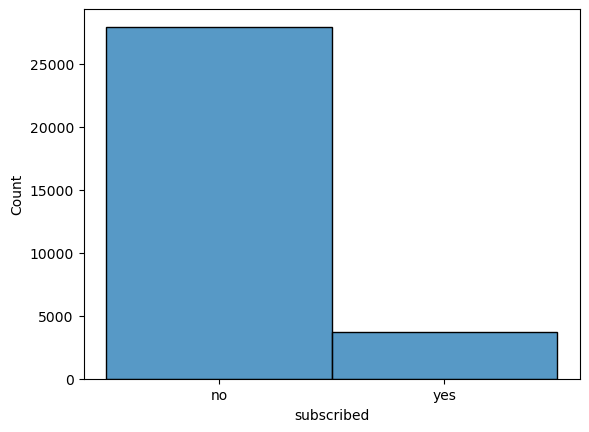

In [27]:
sns.histplot(df_train['subscribed'])
print(df_train['subscribed'].value_counts())
print(df_train['subscribed'].value_counts(normalize=True)*100)

From the above plot we observe that majority are not subscribed around 80-90%

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
LE=LabelEncoder()
for i in df_train:
    df_train[i]=LE.fit_transform(df_train[i])
df_train

age  job  marital  education  default  balance  housing  loan  contact  \
0       38    0        1          3        0     2719        0     0        1   
1       13   11        1          1        0      822        0     0        0   
2        9    7        1          1        0     1709        1     0        0   
3       39    4        0          2        0     3815        0     0        0   
4       13    9        1          1        0      938        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   11    4        2          2        0      819        1     0        0   
31643   35    4        0          2        0     1199        0     1        0   
31644   14    4        2          2        0     1131        0     0        0   
31645   39    9        1          1        0     1044        1     0        1   
31646   37    4        0          1        0     1023        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       18      9        43         1      0         0         3           0  
1       19      5        90         1      0         0         3           0  
2       17      5       239         0      0         0         3           0  
3       21      6       864         0     79         3         2           1  
4        3      3       379         0      0         0         3           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   11      8       115         1      0         0         3           0  
31643    4      6       437         1      0         0         3           1  
31644    6      1        36         2      0         0         3           0  
31645   14      8        21         6    332        12         0           0  
31646   10      5      1410         1      0         0         3           1  

[31647 rows x 17 columns]

In [30]:
df_train.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

Our all the columns are converted into numerical type of data

Bivariate Analysis

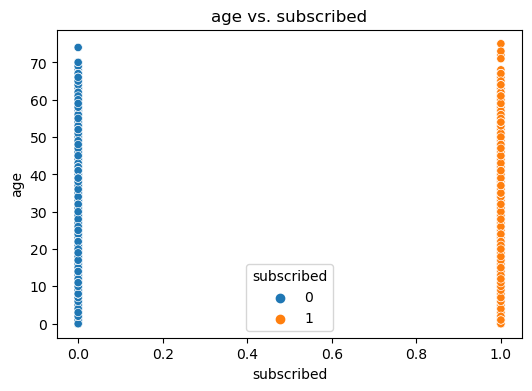

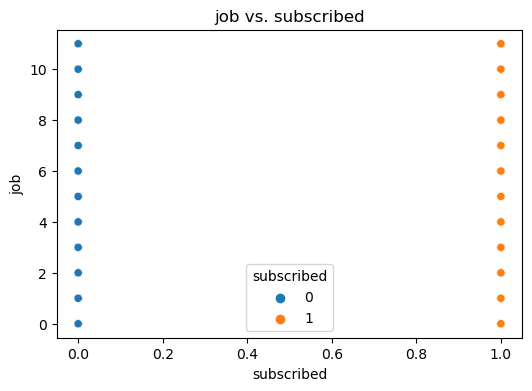

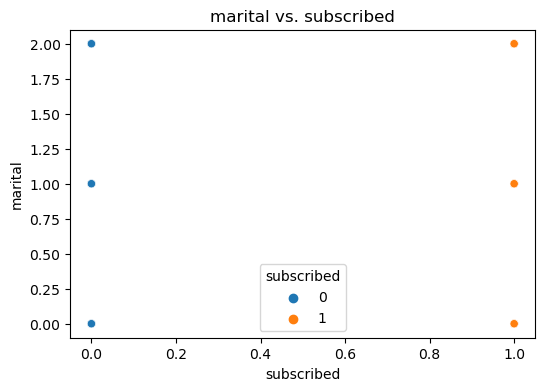

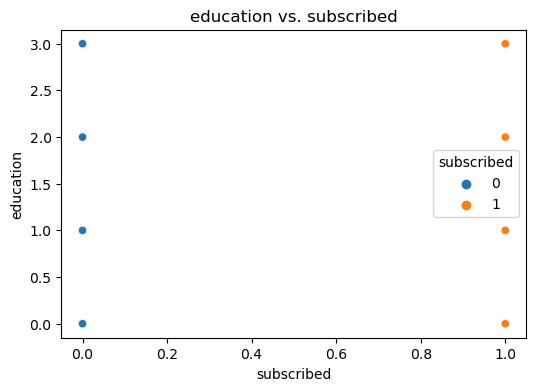

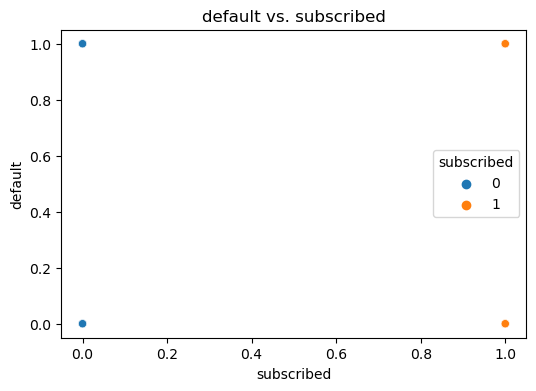

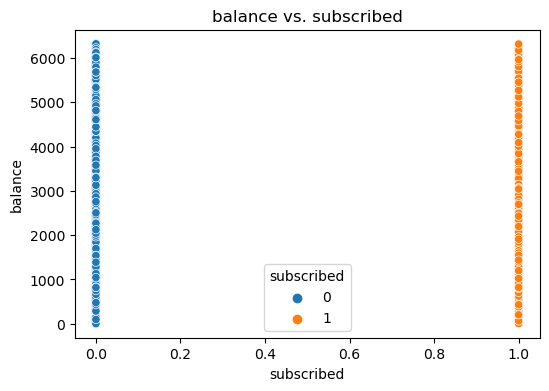

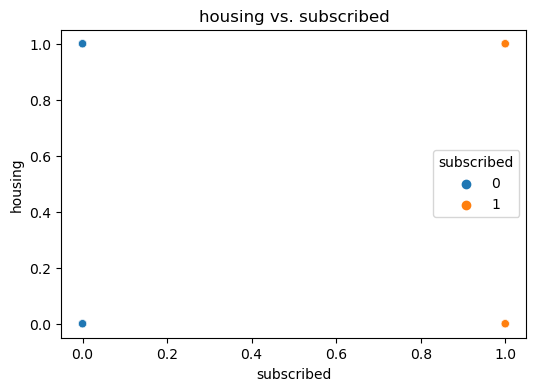

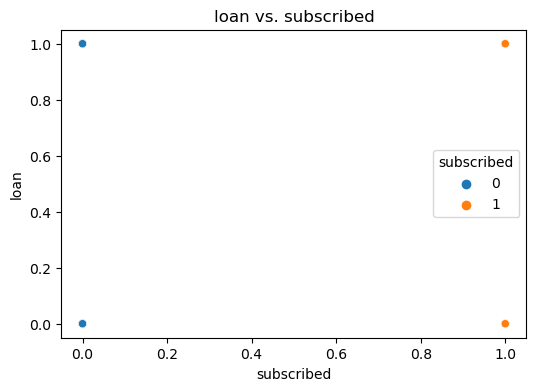

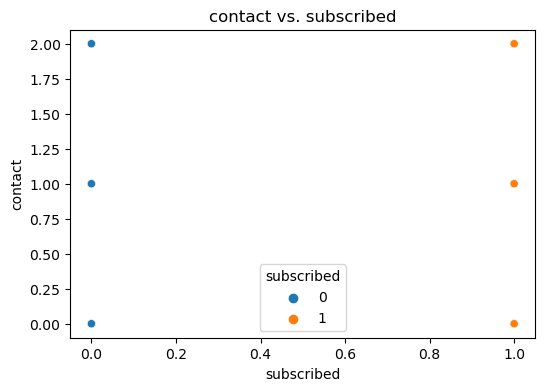

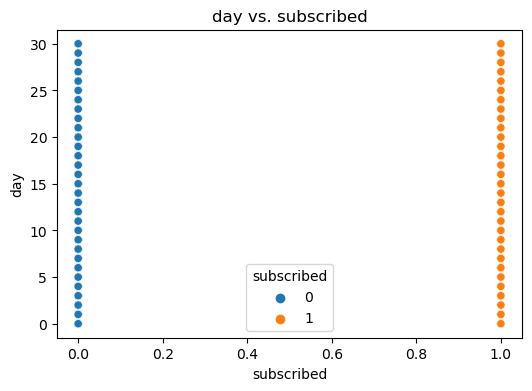

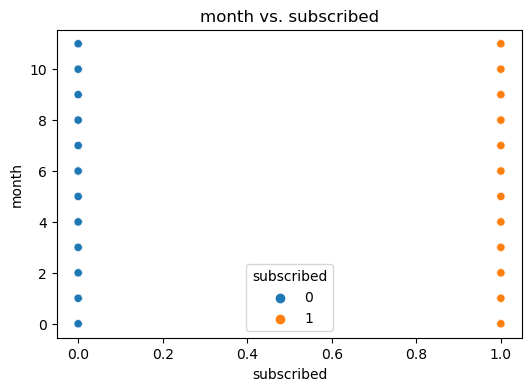

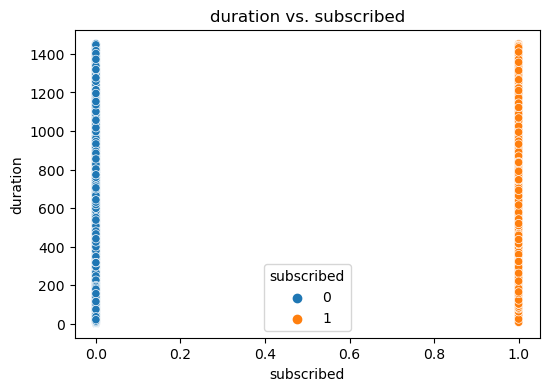

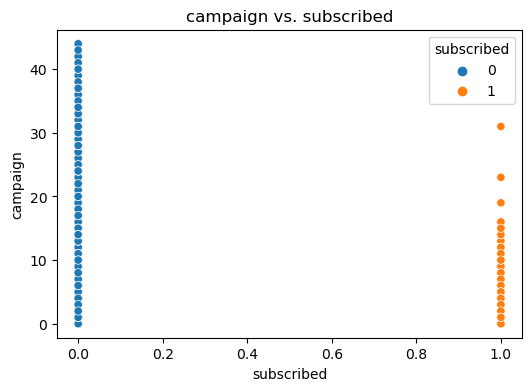

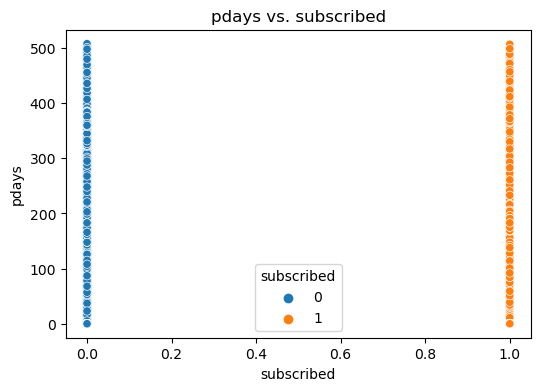

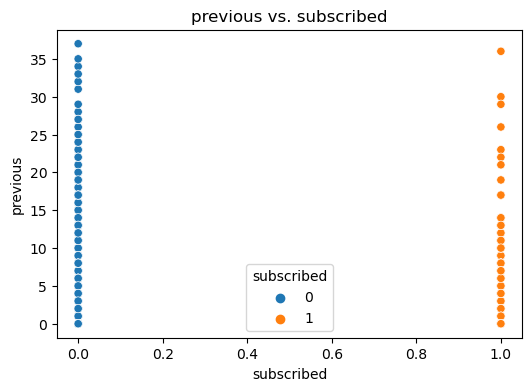

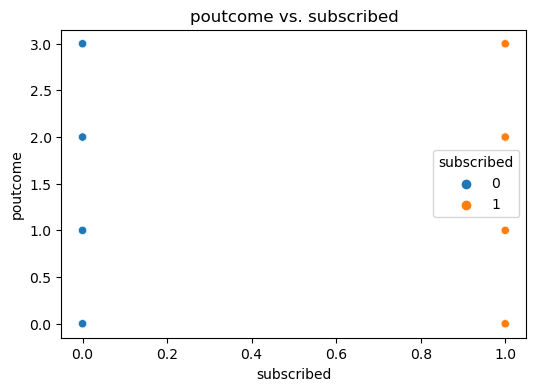

In [31]:
for col in df_train.drop(['subscribed'],axis=1):
    plt.figure(figsize=(6,4))
    plt.title(f'{col} vs. subscribed')
    sns.scatterplot(y=df_train[col],x=df_train['subscribed'],hue=df_train['subscribed'])
    plt.show()

<Figure size 600x400 with 0 Axes>

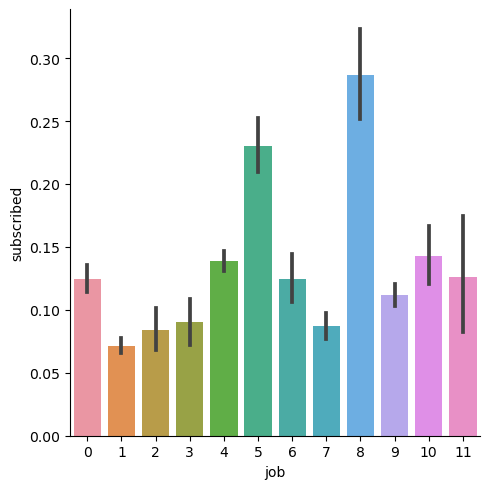

In [32]:
plt.figure(figsize=(6,4))
sns.catplot(x='job',y='subscribed',data=df_train,kind='bar')
plt.show()

We see from the above plot that majority subscriber are from 8 and 5 type of job

<Figure size 600x400 with 0 Axes>

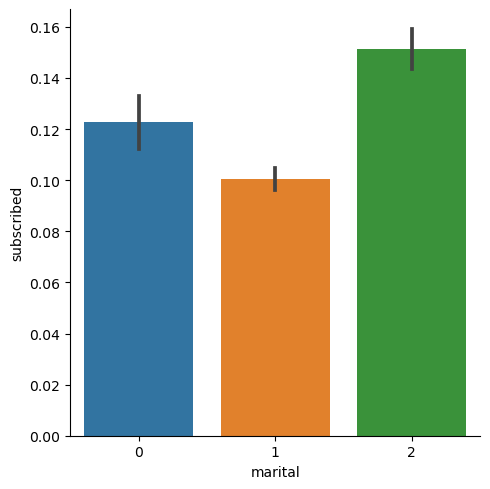

In [33]:
plt.figure(figsize=(6,4))
sns.catplot(x='marital',y='subscribed',data=df_train,kind='bar')
plt.show()

We observe from the above plot that for marital type 2 are subscribed.

<Figure size 600x400 with 0 Axes>

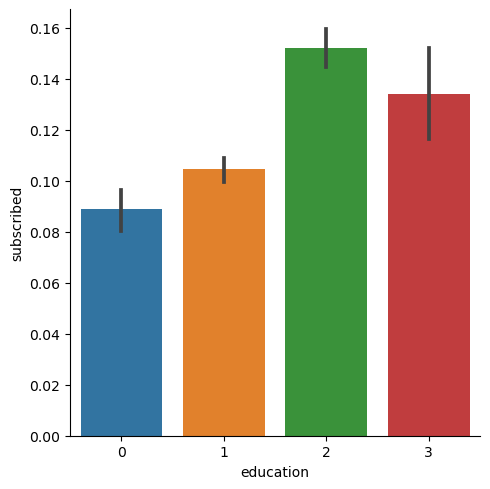

In [34]:
plt.figure(figsize=(6,4))
sns.catplot(x='education',y='subscribed',data=df_train,kind='bar')
plt.show()

we can see from the above plot that mostly subscribers are from 2 and 3 type of education.

<Figure size 600x400 with 0 Axes>

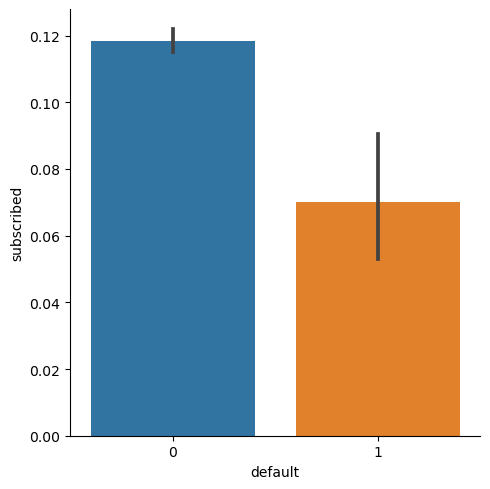

In [35]:
plt.figure(figsize=(6,4))
sns.catplot(x='default',y='subscribed',data=df_train,kind='bar')
plt.show()

We can see from the above plot that mostly non defaults are subscribed

<Figure size 600x400 with 0 Axes>

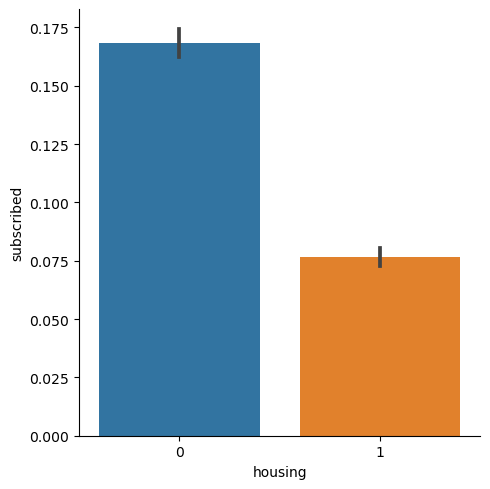

In [36]:
plt.figure(figsize=(6,4))
sns.catplot(x='housing',y='subscribed',data=df_train,kind='bar')
plt.show()

We are clear from the above plot that majority subscribers are non-loan takers

<Figure size 600x400 with 0 Axes>

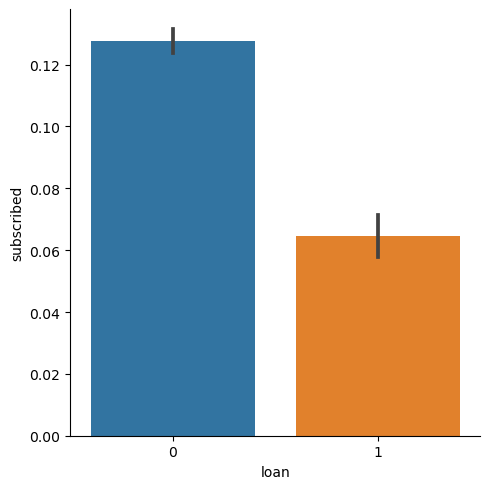

In [37]:
plt.figure(figsize=(6,4))
sns.catplot(x='loan',y='subscribed',data=df_train,kind='bar')
plt.show()

We are clear from the above plot that mostly subscribers are non-personal loan takers

<Figure size 600x400 with 0 Axes>

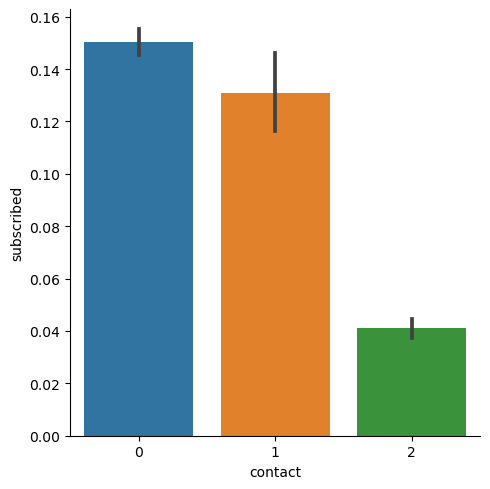

In [38]:
plt.figure(figsize=(6,4))
sns.catplot(x='contact',y='subscribed',data=df_train,kind='bar')
plt.show()

We observe for contact that there are majority of type 0 contact that are subscribed

<Figure size 600x400 with 0 Axes>

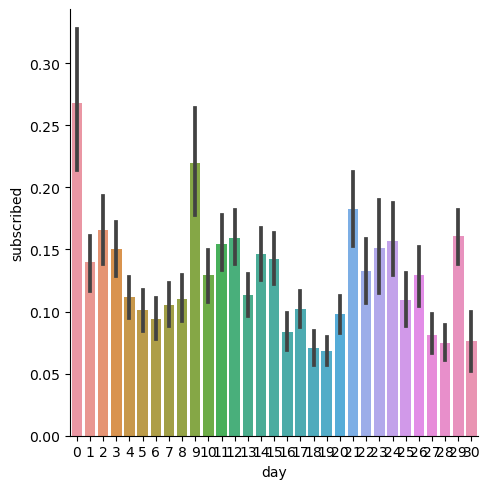

In [39]:
plt.figure(figsize=(6,4))
sns.catplot(x='day',y='subscribed',data=df_train,kind='bar')
plt.show()

We can see from the above plot that mostly subscribed are day 1 , 10 and 32.

<Figure size 600x400 with 0 Axes>

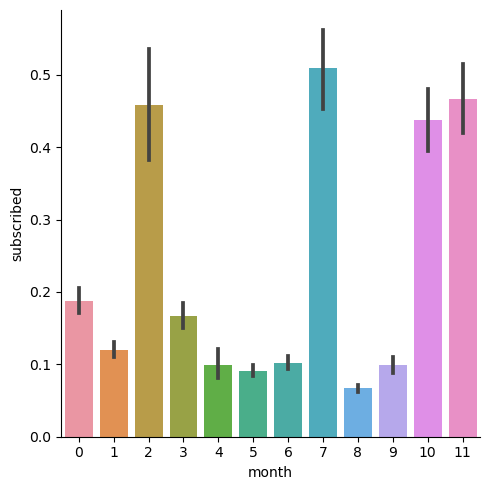

In [40]:
plt.figure(figsize=(6,4))
sns.catplot(x='month',y='subscribed',data=df_train,kind='bar')
plt.show()

From the above plot we observe that majority are subscribed in the month of 2,7,10 and 11.

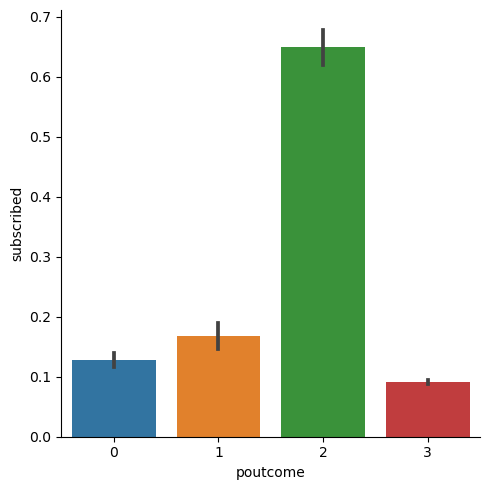

In [41]:
sns.catplot(x='poutcome',y='subscribed',data=df_train,kind='bar')

We can clearly see from the above plot that majority are subcribed in the type 2.

Multivarient analysis

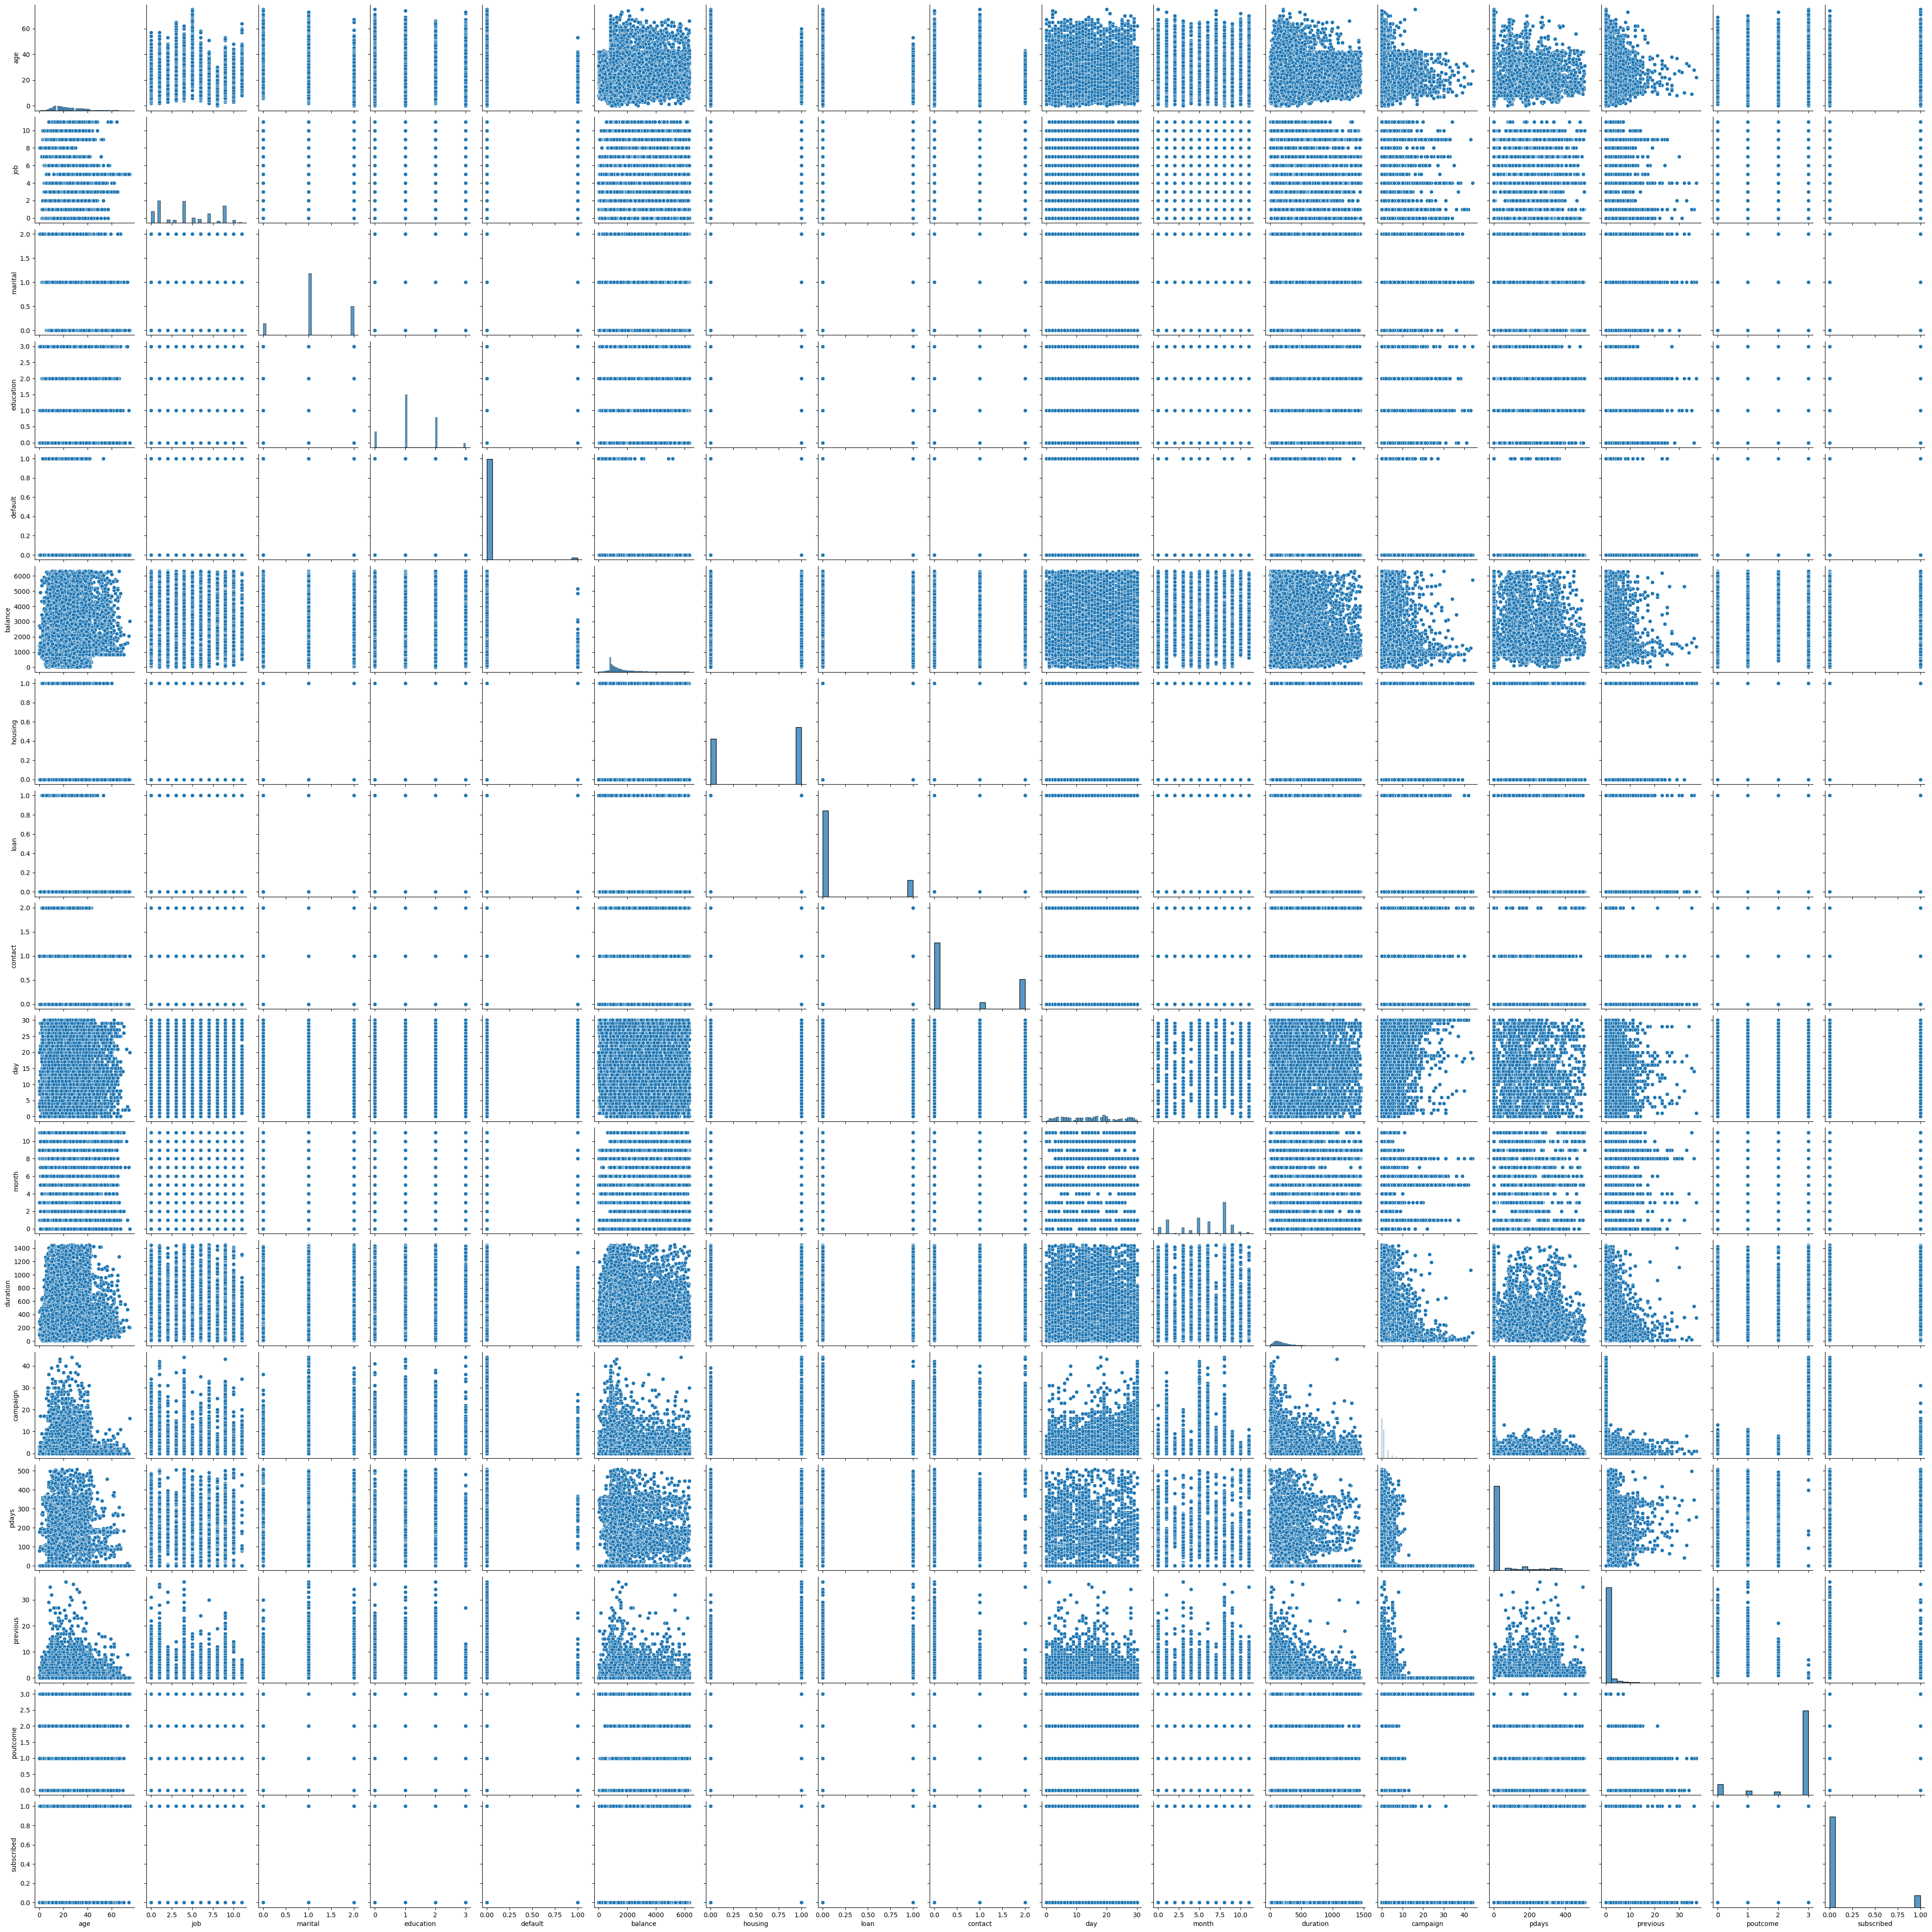

In [42]:
sns.pairplot(df_train)

In [43]:
cor=df_train.corr()
cor

age       job   marital  education   default   balance  \
age         1.000000 -0.020785 -0.406096  -0.102359 -0.016113  0.123262   
job        -0.020785  1.000000  0.066124   0.170347 -0.005217  0.028363   
marital    -0.406096  0.066124  1.000000   0.107547 -0.009591  0.009503   
education  -0.102359  0.170347  0.107547   1.000000 -0.006774  0.073391   
default    -0.016113 -0.005217 -0.009591  -0.006774  1.000000 -0.112012   
balance     0.123262  0.028363  0.009503   0.073391 -0.112012  1.000000   
housing    -0.183755 -0.125347 -0.017846  -0.095376 -0.011823 -0.078310   
loan       -0.012631 -0.039049 -0.041654  -0.045950  0.081567 -0.114014   
contact     0.026747 -0.078253 -0.040180  -0.112000  0.014053 -0.036729   
day        -0.011047  0.020951 -0.007686   0.017902  0.009996  0.007979   
month      -0.038380 -0.089384 -0.003834  -0.055967  0.004694  0.025117   
duration   -0.006820  0.001568  0.012132   0.004107 -0.010035  0.039534   
campaign    0.005781  0.001504 -0.009349   0.005805  0.018730 -0.026384   
pdays      -0.023029 -0.023661  0.020328  -0.003459 -0.029432  0.012430   
previous    0.007787 -0.002984  0.017754   0.016342 -0.020128  0.039181   
poutcome    0.006468  0.007101 -0.019770  -0.019007  0.035067 -0.042371   
subscribed  0.024469  0.038921  0.046043   0.066051 -0.020168  0.084294   

             housing      loan   contact       day     month  duration  \
age        -0.183755 -0.012631  0.026747 -0.011047 -0.038380 -0.006820   
job        -0.125347 -0.039049 -0.078253  0.020951 -0.089384  0.001568   
marital    -0.017846 -0.041654 -0.040180 -0.007686 -0.003834  0.012132   
education  -0.095376 -0.045950 -0.112000  0.017902 -0.055967  0.004107   
default    -0.011823  0.081567  0.014053  0.009996  0.004694 -0.010035   
balance    -0.078310 -0.114014 -0.036729  0.007979  0.025117  0.039534   
housing     1.000000  0.036244  0.195103 -0.025666  0.271442  0.004227   
loan        0.036244  1.000000 -0.009213  0.014769  0.024186 -0.013499   
contact     0.195103 -0.009213  1.000000 -0.027046  0.362934 -0.020445   
day        -0.025666  0.014769 -0.027046  1.000000 -0.000604 -0.034033   
month       0.271442  0.024186  0.362934 -0.000604  1.000000  0.006256   
duration    0.004227 -0.013499 -0.020445 -0.034033  0.006256  1.000000   
campaign   -0.021613  0.009357  0.022402  0.159929 -0.106394 -0.087361   
pdays       0.123482 -0.019742 -0.249535 -0.089611  0.026139  0.003479   
previous    0.040659 -0.011372 -0.181549 -0.057131  0.029266  0.002061   
poutcome   -0.092677  0.010919  0.272083  0.077586 -0.029369  0.007738   
subscribed -0.141092 -0.072266 -0.150051 -0.029600 -0.028088  0.405411   

            campaign     pdays  previous  poutcome  subscribed  
age         0.005781 -0.023029  0.007787  0.006468    0.024469  
job         0.001504 -0.023661 -0.002984  0.007101    0.038921  
marital    -0.009349  0.020328  0.017754 -0.019770    0.046043  
education   0.005805 -0.003459  0.016342 -0.019007    0.066051  
default     0.018730 -0.029432 -0.020128  0.035067   -0.020168  
balance    -0.026384  0.012430  0.039181 -0.042371    0.084294  
housing    -0.021613  0.123482  0.040659 -0.092677   -0.141092  
loan        0.009357 -0.019742 -0.011372  0.010919   -0.072266  
contact     0.022402 -0.249535 -0.181549  0.272083   -0.150051  
day         0.159929 -0.089611 -0.057131  0.077586   -0.029600  
month      -0.106394  0.026139  0.029266 -0.029369   -0.028088  
duration   -0.087361  0.003479  0.002061  0.007738    0.405411  
campaign    1.000000 -0.087713 -0.042482  0.101212   -0.070926  
pdays      -0.087713  1.000000  0.553339 -0.865252    0.104237  
previous   -0.042482  0.553339  1.000000 -0.598301    0.115842  
poutcome    0.101212 -0.865252 -0.598301  1.000000   -0.080895  
subscribed -0.070926  0.104237  0.115842 -0.080895    1.000000

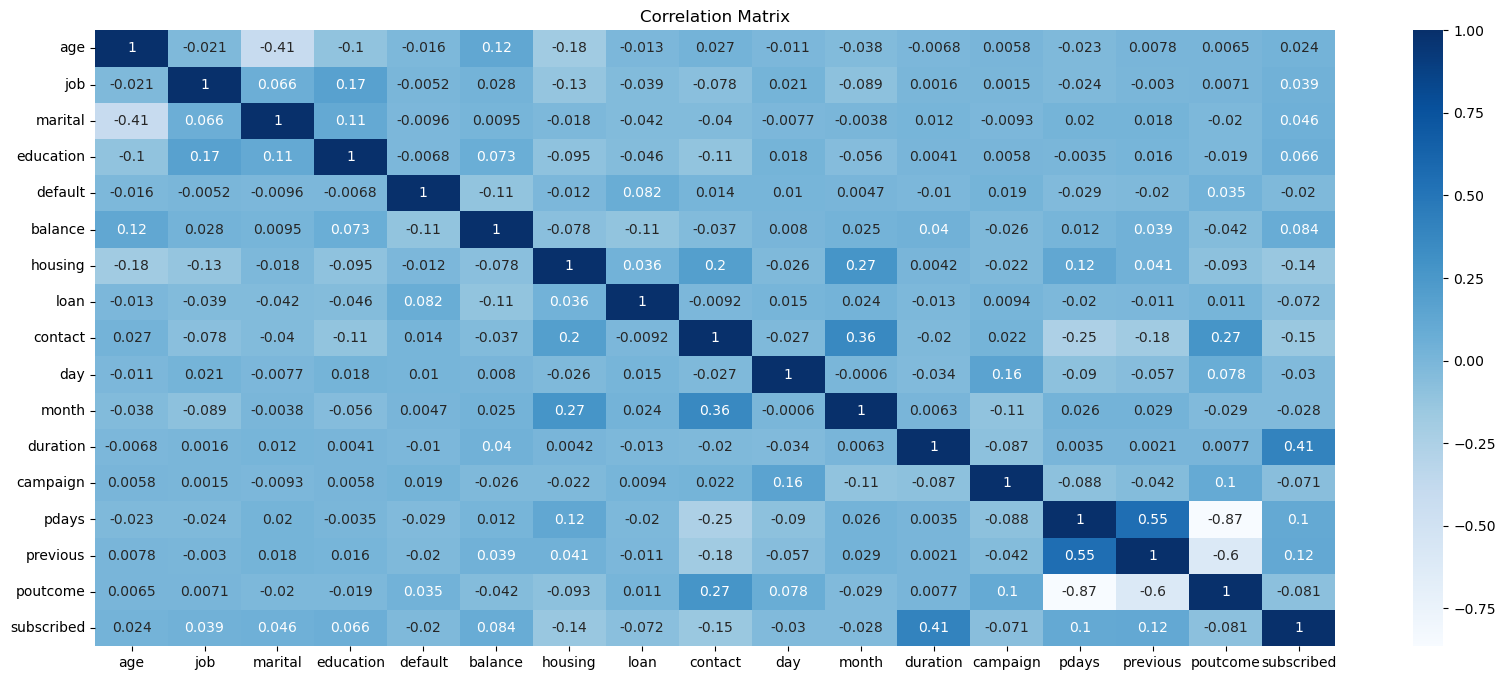

In [44]:
plt.figure(figsize=(20,8))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

In [45]:
cor1=df_train.drop(['subscribed'],axis=1).corr()
cor1

age       job   marital  education   default   balance  \
age        1.000000 -0.020785 -0.406096  -0.102359 -0.016113  0.123262   
job       -0.020785  1.000000  0.066124   0.170347 -0.005217  0.028363   
marital   -0.406096  0.066124  1.000000   0.107547 -0.009591  0.009503   
education -0.102359  0.170347  0.107547   1.000000 -0.006774  0.073391   
default   -0.016113 -0.005217 -0.009591  -0.006774  1.000000 -0.112012   
balance    0.123262  0.028363  0.009503   0.073391 -0.112012  1.000000   
housing   -0.183755 -0.125347 -0.017846  -0.095376 -0.011823 -0.078310   
loan      -0.012631 -0.039049 -0.041654  -0.045950  0.081567 -0.114014   
contact    0.026747 -0.078253 -0.040180  -0.112000  0.014053 -0.036729   
day       -0.011047  0.020951 -0.007686   0.017902  0.009996  0.007979   
month     -0.038380 -0.089384 -0.003834  -0.055967  0.004694  0.025117   
duration  -0.006820  0.001568  0.012132   0.004107 -0.010035  0.039534   
campaign   0.005781  0.001504 -0.009349   0.005805  0.018730 -0.026384   
pdays     -0.023029 -0.023661  0.020328  -0.003459 -0.029432  0.012430   
previous   0.007787 -0.002984  0.017754   0.016342 -0.020128  0.039181   
poutcome   0.006468  0.007101 -0.019770  -0.019007  0.035067 -0.042371   

            housing      loan   contact       day     month  duration  \
age       -0.183755 -0.012631  0.026747 -0.011047 -0.038380 -0.006820   
job       -0.125347 -0.039049 -0.078253  0.020951 -0.089384  0.001568   
marital   -0.017846 -0.041654 -0.040180 -0.007686 -0.003834  0.012132   
education -0.095376 -0.045950 -0.112000  0.017902 -0.055967  0.004107   
default   -0.011823  0.081567  0.014053  0.009996  0.004694 -0.010035   
balance   -0.078310 -0.114014 -0.036729  0.007979  0.025117  0.039534   
housing    1.000000  0.036244  0.195103 -0.025666  0.271442  0.004227   
loan       0.036244  1.000000 -0.009213  0.014769  0.024186 -0.013499   
contact    0.195103 -0.009213  1.000000 -0.027046  0.362934 -0.020445   
day       -0.025666  0.014769 -0.027046  1.000000 -0.000604 -0.034033   
month      0.271442  0.024186  0.362934 -0.000604  1.000000  0.006256   
duration   0.004227 -0.013499 -0.020445 -0.034033  0.006256  1.000000   
campaign  -0.021613  0.009357  0.022402  0.159929 -0.106394 -0.087361   
pdays      0.123482 -0.019742 -0.249535 -0.089611  0.026139  0.003479   
previous   0.040659 -0.011372 -0.181549 -0.057131  0.029266  0.002061   
poutcome  -0.092677  0.010919  0.272083  0.077586 -0.029369  0.007738   

           campaign     pdays  previous  poutcome  
age        0.005781 -0.023029  0.007787  0.006468  
job        0.001504 -0.023661 -0.002984  0.007101  
marital   -0.009349  0.020328  0.017754 -0.019770  
education  0.005805 -0.003459  0.016342 -0.019007  
default    0.018730 -0.029432 -0.020128  0.035067  
balance   -0.026384  0.012430  0.039181 -0.042371  
housing   -0.021613  0.123482  0.040659 -0.092677  
loan       0.009357 -0.019742 -0.011372  0.010919  
contact    0.022402 -0.249535 -0.181549  0.272083  
day        0.159929 -0.089611 -0.057131  0.077586  
month     -0.106394  0.026139  0.029266 -0.029369  
duration  -0.087361  0.003479  0.002061  0.007738  
campaign   1.000000 -0.087713 -0.042482  0.101212  
pdays     -0.087713  1.000000  0.553339 -0.865252  
previous  -0.042482  0.553339  1.000000 -0.598301  
poutcome   0.101212 -0.865252 -0.598301  1.000000

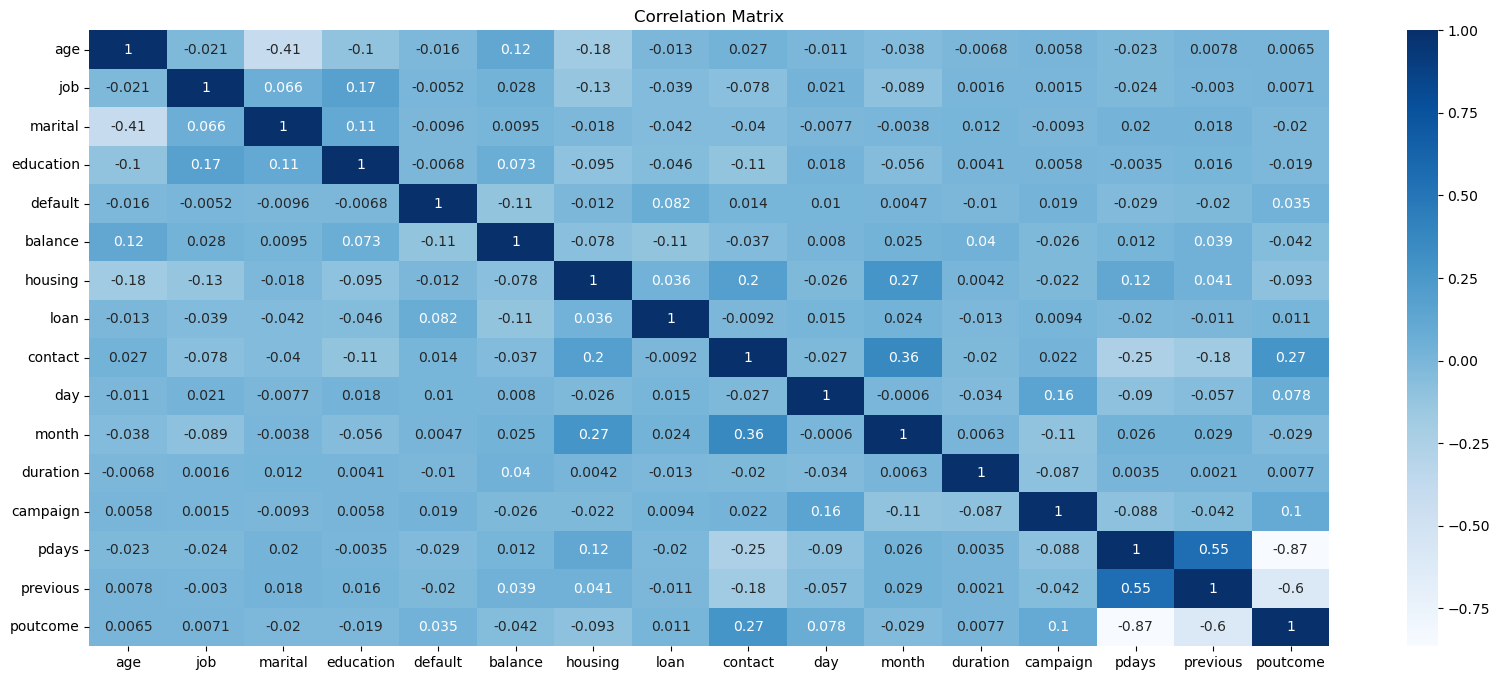

In [46]:
plt.figure(figsize=(20,8))
sns.heatmap(cor1, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

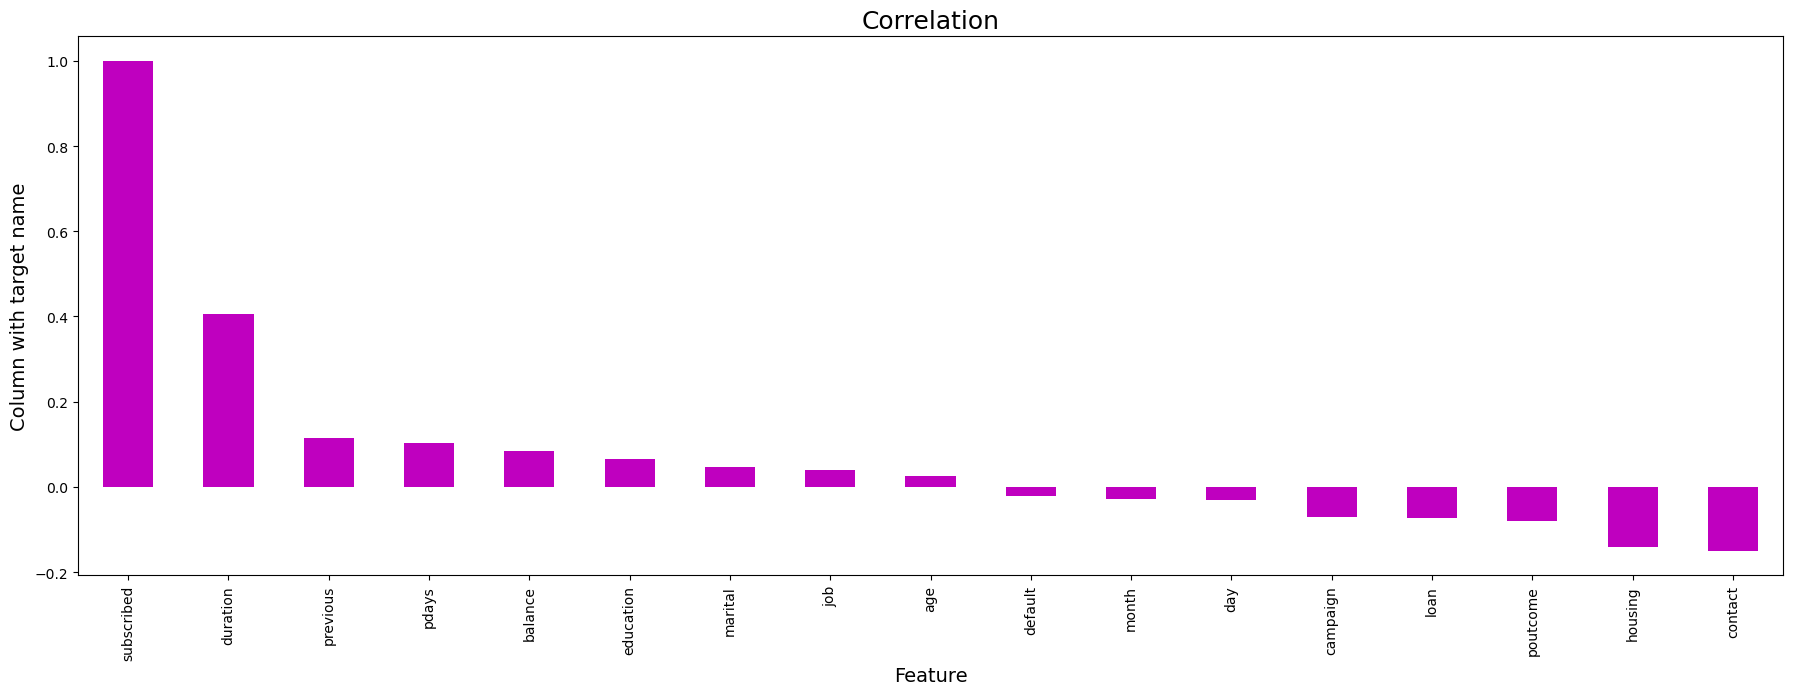

In [47]:
plt.figure(figsize=(22,7))
cor['subscribed'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can see that duration is positively correlated,housing and contact is negatively correlated

In [48]:
df_train.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      22.956520      4.332923      1.167220      1.225013      0.018485   
std       10.621873      3.271868      0.607186      0.749195      0.134700   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.000000      1.000000      1.000000      1.000000      0.000000   
50%       21.000000      4.000000      1.000000      1.000000      0.000000   
75%       30.000000      7.000000      2.000000      2.000000      0.000000   
max       75.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean    1822.242266      0.555629      0.162132      0.644642     14.835466   
std     1352.093883      0.496904      0.368578      0.899480      8.337097   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      892.000000      0.000000      0.000000      0.000000      7.000000   
50%     1269.000000      1.000000      0.000000      0.000000     15.000000   
75%     2245.000000      1.000000      0.000000      2.000000     20.000000   
max     6325.000000      1.000000      1.000000      2.000000     30.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       5.533131    253.451796      1.764275     39.065946      0.565488   
std        3.004247    235.206200      3.092486     94.878761      1.850987   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000    103.000000      0.000000      0.000000      0.000000   
50%        6.000000    179.000000      1.000000      0.000000      0.000000   
75%        8.000000    317.500000      2.000000      0.000000      0.000000   
max       11.000000   1453.000000     44.000000    508.000000     37.000000   

           poutcome    subscribed  
count  31647.000000  31647.000000  
mean       2.566152      0.117389  
std        0.982069      0.321888  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

from the above we can observe: 
1.Since count is same for all the columns so there are no missing values present in the dataset 
2.Mean is greater than median(50%)for pdays,previous and subscribed so data is skewed to right for these coulmns 
3.Mean is less than median(50%)for age,job,marital,eduction,default,balance,housing,loan,contact,day,month,duration,campaign and poutcome so data is skewed to left for this column 
4.Large difference in 75% and max value for age,job,balance,duration,campaign,pdays and previous column so this shows the dataset has outliers and skewness present.

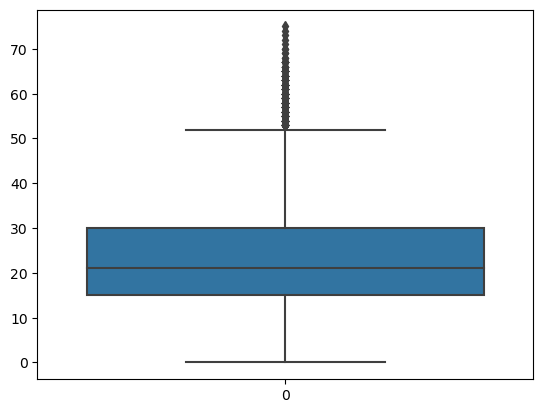

In [49]:
plt.plot(figsize=(3,4))
sns.boxplot(df_train['age'])
plt.show()

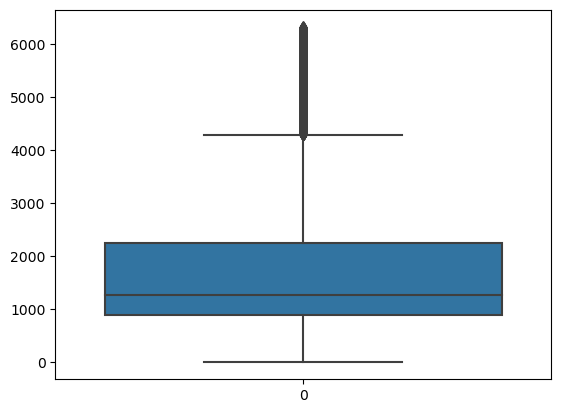

In [50]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['balance'])
plt.show()

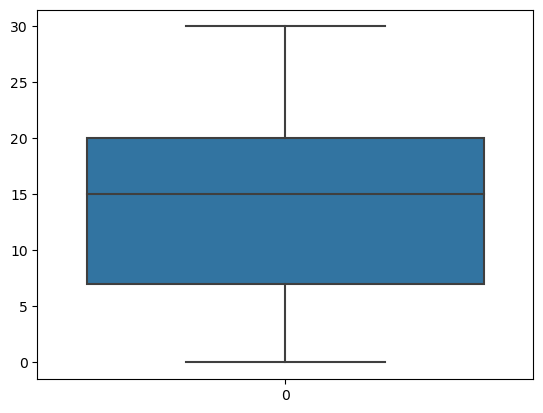

In [51]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['day'])
plt.show()

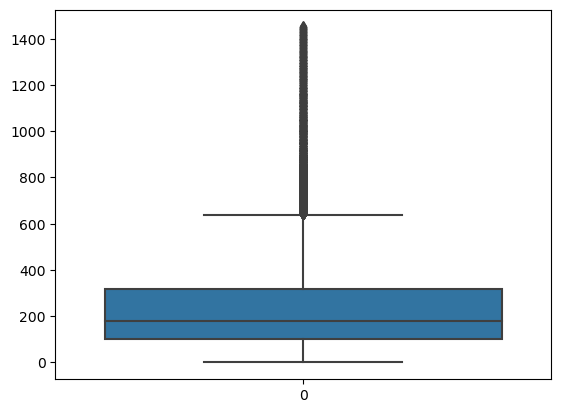

In [52]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['duration'])
plt.show()

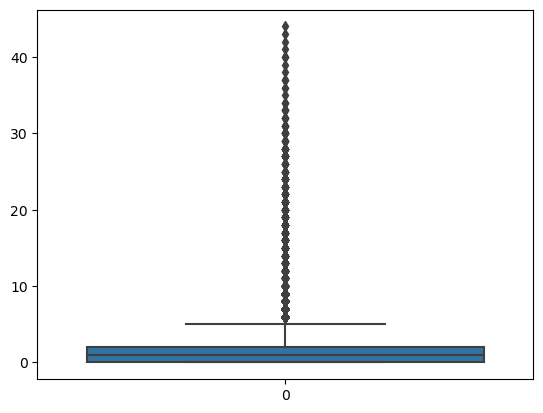

In [53]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['campaign'])
plt.show()

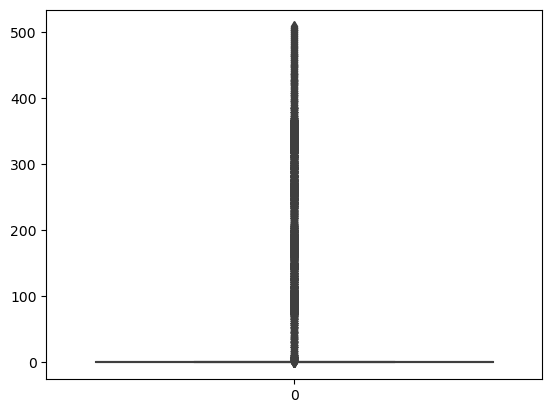

In [54]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['pdays'])
plt.show()

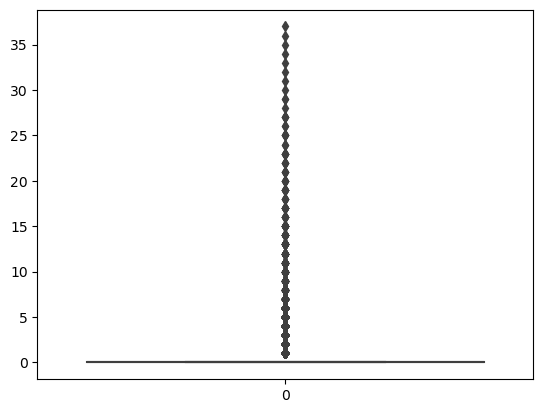

In [55]:
plt.plot(figsize=(2,2))
sns.boxplot(df_train['previous'])
plt.show()

We observe that for previous,pdays and balance are having too much outliers so we drop them

In [56]:
df_train.drop(['previous','pdays','balance'],axis=1,inplace=True)

In [57]:
df_train.head()

age  job  marital  education  default  housing  loan  contact  day  month  \
0   38    0        1          3        0        0     0        1   18      9   
1   13   11        1          1        0        0     0        0   19      5   
2    9    7        1          1        0        1     0        0   17      5   
3   39    4        0          2        0        0     0        0   21      6   
4   13    9        1          1        0        1     0        0    3      3   

   duration  campaign  poutcome  subscribed  
0        43         1         3           0  
1        90         1         3           0  
2       239         0         3           0  
3       864         0         2           1  
4       379         0         3           0

In [58]:
x=df_train.drop(['subscribed'],axis=1)
y=df_train['subscribed']

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3

x=x[(z<3).all(axis=1)]
print(x.shape)

y=y[(z<3).all(axis=1)]
print(y.shape)


(29428, 13)
(29428,)


In [60]:
data_loss=(31647-29428)/31647*100
data_loss

7.01172307011723

In [61]:
df_train.skew()

age           0.678287
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      2.120862
campaign      4.658975
poutcome     -1.996421
subscribed    2.377445
dtype: float64

we have to remove skewness in duration and campaign rest all are acceptable and of object datatype

In [62]:
from scipy.stats import boxcox,yeojohnson

In [63]:
df_train['duration']=yeojohnson(df_train['duration'])[0]

In [64]:
df_train['campaign']=yeojohnson(df_train['campaign'])[0]

In [65]:
df_train.skew()

age           0.678287
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.013892
campaign      0.165933
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values   Features
0     4.780890        age
1     2.767759        job
2     4.327802    marital
3     3.669714  education
4          NaN    default
5     2.406595    housing
6     1.188820       loan
7     1.957165    contact
8     4.011115        day
9     5.012784      month
10    2.494415   duration
11    1.616432   campaign
12    7.018749   poutcome

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.51982216, -1.31718769, -0.28278261, ..., -1.02624618,
        -0.23087928,  0.44931293],
       [-0.95521605,  2.0300211 , -0.28278261, ..., -0.76981006,
        -0.23087928,  0.44931293],
       [-1.35122216,  0.81285427, -0.28278261, ...,  0.043147  ,
        -0.75008419,  0.44931293],
       ...,
       [ 1.22281757, -0.10002085, -1.93260949, ...,  1.12345235,
        -0.23087928,  0.44931293],
       [-0.85621452, -0.10002085,  1.36704426, ..., -1.0644388 ,
         0.28832563,  0.44931293],
       [ 1.61882368,  1.42143769, -0.28278261, ..., -1.14628011,
         2.36514527, -2.56353398]])

In [68]:
y.value_counts()

0    26357
1     3071
Name: subscribed, dtype: int64

As we observed that our data is not balanced so we have to balanced it,for that we can use SMOTE technique here we use over sampling method to balance data

In [69]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [70]:
y.value_counts()

0    26357
1    26357
Name: subscribed, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [72]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  80.06323110970598 on Random_state  64


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [74]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.9571925387290547
Confusion Matrix:  [[7536  424]
 [ 253 7602]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.95      0.96      7960
           1       0.95      0.97      0.96      7855

    accuracy                           0.96     15815
   macro avg       0.96      0.96      0.96     15815
weighted avg       0.96      0.96      0.96     15815



In [75]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8006323110970598
Confusion Matrix:  [[6292 1668]
 [1485 6370]]
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.79      0.80      7960
           1       0.79      0.81      0.80      7855

    accuracy                           0.80     15815
   macro avg       0.80      0.80      0.80     15815
weighted avg       0.80      0.80      0.80     15815



In [76]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8698071451153968
Confusion Matrix:  [[6506 1454]
 [ 605 7250]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.82      0.86      7960
           1       0.83      0.92      0.88      7855

    accuracy                           0.87     15815
   macro avg       0.87      0.87      0.87     15815
weighted avg       0.87      0.87      0.87     15815



In [77]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.9184318684792918
Confusion Matrix:  [[7186  774]
 [ 516 7339]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.90      0.92      7960
           1       0.90      0.93      0.92      7855

    accuracy                           0.92     15815
   macro avg       0.92      0.92      0.92     15815
weighted avg       0.92      0.92      0.92     15815



In [78]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8825798292760038
Confusion Matrix:  [[7003  957]
 [ 900 6955]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.88      0.88      7960
           1       0.88      0.89      0.88      7855

    accuracy                           0.88     15815
   macro avg       0.88      0.88      0.88     15815
weighted avg       0.88      0.88      0.88     15815



In [79]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.9407524502055011
Confusion Matrix:  [[7448  512]
 [ 425 7430]]
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.94      0.94      7960
           1       0.94      0.95      0.94      7855

    accuracy                           0.94     15815
   macro avg       0.94      0.94      0.94     15815
weighted avg       0.94      0.94      0.94     15815



In [80]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.9006924  0.96670777 0.96803566 0.96917386 0.96632518]
0.954186973824822
Difference between accuracy score and cross validation score is:  -0.013434523619320848


In [81]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.78146638 0.79389168 0.79996206 0.80479939 0.7934927 ]
0.7947224412917743
Difference between accuracy score and cross validation score is:  0.14603000891372686


In [82]:
score2=cross_val_score(svm,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.85516456 0.86863322 0.8720478  0.8720478  0.86596471]
0.8667716203113456
Difference between accuracy score and cross validation score is:  0.07398082989415555


In [83]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.84558475 0.92810396 0.93142369 0.93275159 0.92724341]
0.913021478581188
Difference between accuracy score and cross validation score is:  0.02773097162431315


In [84]:
score4=cross_val_score(ADA,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.82462297 0.88921559 0.89803661 0.89737266 0.8921457 ]
0.8802787090145671
Difference between accuracy score and cross validation score is:  0.06047374119093407


In [85]:
score5=cross_val_score(BG,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.8743242  0.95238547 0.95304942 0.95428246 0.95029406]
0.9368671212000729
Difference between accuracy score and cross validation score is:  0.003885329005428262


I choose Random Forest classifier as the best working Model as it has least difference in accuracy and cross validation score 

In [87]:
param={'n_estimators':[200],
       'criterion':['gini'],
       'max_depth':[None],
       'min_samples_split':[3],
       'max_features':['log2']
      }

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
GSCV=GridSearchCV(RandomForestClassifier(),param,cv=5)

In [90]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': ['log2'], 'min_samples_split': [3],
                         'n_estimators': [200]})

In [91]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

In [92]:
final = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None,min_samples_split=3,max_features='log2')
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.956370534302877


As we can see that accuracy is same so saving the model

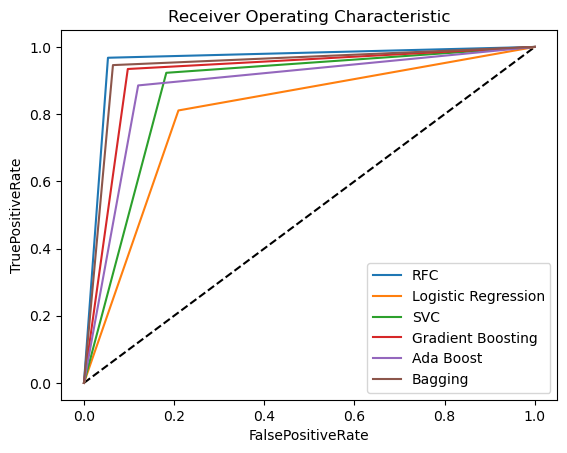

In [93]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = svm.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = ADA.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = BG.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "SVC")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

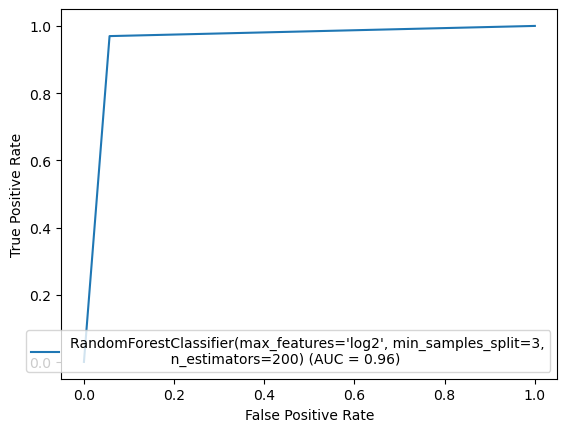

In [94]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

Now we observe that we get auc_score of 96 which is very good

In [110]:
import joblib
joblib.dump(final, "BankMarketing.pkl")

['BankMarketing.pkl']

In [137]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

In [138]:
df_test.drop(['ID','previous','pdays','balance'],axis=1,inplace=True)
df_test

age            job   marital  education default housing loan  \
0       32       services   married  secondary      no     yes   no   
1       78        retired  divorced    primary      no      no   no   
2       31  self-employed    single   tertiary      no     yes   no   
3       57       services    single    primary      no     yes   no   
4       45    blue-collar  divorced  secondary      no      no  yes   
...    ...            ...       ...        ...     ...     ...  ...   
13559   39     management   married   tertiary      no      no   no   
13560   54    blue-collar   married    primary      no     yes   no   
13561   35        retired   married    primary      no     yes   no   
13562   29         admin.    single  secondary      no      no   no   
13563   29         admin.   married  secondary      no     yes   no   

         contact  day month  duration  campaign poutcome  
0       cellular   15   may        20         6  unknown  
1      telephone    1   jul       372         1  unknown  
2        unknown   16   may       676         1  unknown  
3      telephone   13   may        65         2  unknown  
4        unknown    3   jul       111         1  unknown  
...          ...  ...   ...       ...       ...      ...  
13559   cellular   28   aug       148         4  unknown  
13560    unknown   20   jun       158         1  unknown  
13561   cellular   29   jan       136         1  unknown  
13562   cellular    9   nov       208         2  success  
13563   cellular    6   may       339         1  failure  

[13564 rows x 13 columns]

In [139]:
LE=LabelEncoder()
df_test['job']=LE.fit_transform(df_test['job'])
df_test['marital']=LE.fit_transform(df_test['marital'])
df_test['education']=LE.fit_transform(df_test['education'])
df_test['default']=LE.fit_transform(df_test['default'])
df_test['housing']=LE.fit_transform(df_test['housing'])
df_test['loan']=LE.fit_transform(df_test['loan'])
df_test['contact']=LE.fit_transform(df_test['contact'])
df_test['month']=LE.fit_transform(df_test['month'])
df_test['poutcome']=LE.fit_transform(df_test['poutcome'])
df_test

age  job  marital  education  default  housing  loan  contact  day  \
0       32    7        1          1        0        1     0        0   15   
1       78    5        0          0        0        0     0        1    1   
2       31    6        2          2        0        1     0        2   16   
3       57    7        2          0        0        1     0        1   13   
4       45    1        0          1        0        0     1        2    3   
...    ...  ...      ...        ...      ...      ...   ...      ...  ...   
13559   39    4        1          2        0        0     0        0   28   
13560   54    1        1          0        0        1     0        2   20   
13561   35    5        1          0        0        1     0        0   29   
13562   29    0        2          1        0        0     0        0    9   
13563   29    0        1          1        0        1     0        0    6   

       month  duration  campaign  poutcome  
0          8        20         6         3  
1          5       372         1         3  
2          8       676         1         3  
3          8        65         2         3  
4          5       111         1         3  
...      ...       ...       ...       ...  
13559      1       148         4         3  
13560      6       158         1         3  
13561      4       136         1         3  
13562      9       208         2         2  
13563      8       339         1         0  

[13564 rows x 13 columns]

In [140]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
threshold=3

df_test=df_test[(z<3).all(axis=1)]
print(df_test.shape)

(12659, 13)


In [141]:
data_loss=(13564-12659)/13564*100
data_loss

6.672073134768505

In [142]:
df_test.skew()

age          0.446826
job          0.256357
marital     -0.107045
education    0.189617
default      0.000000
housing     -0.245640
loan         1.922013
contact      0.799586
day          0.123708
month       -0.480857
duration     1.585027
campaign     1.964123
poutcome    -1.872481
dtype: float64

We can see skewness in loan,campaign,duration and poutcome removing from campaign and duration as others are object datatype

In [143]:
df_test['campaign']=boxcox(df_test['campaign'])[0]

In [144]:
df_test['duration']=yeojohnson(df_test['duration'])[0]

In [145]:
df_test.skew()

age          0.446826
job          0.256357
marital     -0.107045
education    0.189617
default      0.000000
housing     -0.245640
loan         1.922013
contact      0.799586
day          0.123708
month       -0.480857
duration     0.003059
campaign     0.150028
poutcome    -1.872481
dtype: float64

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_test)
x

array([[-0.85526028,  0.80622687, -0.27932725, ..., -2.08527546,
         1.55466315,  0.46005899],
       [-0.95421595,  0.50201434,  1.36227148, ...,  1.80749695,
        -1.11225629,  0.46005899],
       [ 1.61863147,  0.80622687,  1.36227148, ..., -1.11222643,
         0.22379071,  0.46005899],
       ...,
       [-0.55839327,  0.19780182, -0.27932725, ..., -0.3510423 ,
        -1.11225629,  0.46005899],
       [-1.15212729, -1.32326079,  1.36227148, ...,  0.1481503 ,
         0.22379071, -0.52221235],
       [-1.15212729, -1.32326079, -0.27932725, ...,  0.78368645,
        -1.11225629, -2.48675503]])

In [147]:
model = joblib.load("BankMarketing.pkl")
prediction=model.predict(x)
prediction

array([0, 0, 0, ..., 0, 1, 1])

In [149]:
Result=pd.DataFrame({
    'ans':prediction
})
dff

ans
0        0
1        0
2        0
3        0
4        1
...    ...
12654    0
12655    0
12656    0
12657    1
12658    1

[12659 rows x 1 columns]

In [152]:
Test=df_test
result = pd.concat([Test, Result], axis=1)
result.head()

age  job  marital  education  default  housing  loan  contact   day  \
0  32.0  7.0      1.0        1.0      0.0      1.0   0.0      0.0  15.0   
2  31.0  6.0      2.0        2.0      0.0      1.0   0.0      2.0  16.0   
3  57.0  7.0      2.0        0.0      0.0      1.0   0.0      1.0  13.0   
4  45.0  1.0      0.0        1.0      0.0      0.0   1.0      2.0   3.0   
5  32.0  4.0      2.0        2.0      0.0      1.0   0.0      0.0  22.0   

   month   duration  campaign  poutcome  ans  
0    8.0   4.331593  1.158755       3.0  0.0  
2    8.0  14.490627  0.000000       3.0  0.0  
3    8.0   6.870975  0.580502       3.0  0.0  
4    5.0   8.277255  0.000000       3.0  1.0  
5    5.0  12.908391  0.580502       3.0  0.0